In [1]:
from dataset_helpers import *
import matplotlib.pyplot as plt
from PIL import Image

### Flicker-8k dataset

In [1]:
pwd

'/home/ntnhu/projects/VideoFall-VBS2022/searching'

In [1]:
from dataset_helpers import *
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
DATASET_PATH

'/home/ntnhu/DCU/projects/object_detection/dataset/Flicker-8k'

In [3]:
data = dataset(src_path=DATASET_PATH, feature_path=FEATURE_PATH)
data.get_file_name()
data.preprocess_dataset(entire_dataset=False)
# data.load_dataset()
print("Features: ", data.features)

 10%|█         | 1/10 [00:00<00:01,  5.70it/s]

Preprocess a subset of the dataset...


100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

Features:  None


In [3]:
query = "two people"
best_images = data.search_query(query, num_matches=10)
print("Length of features: ", len(data.features))
print("Best images: ", best_images)

Length of features:  8091
Best images:  [(0.2883, 8018), (0.2834, 5003), (0.2815, 844), (0.2798, 299), (0.2747, 7635), (0.2734, 125), (0.2727, 1396), (0.2712, 6869), (0.2703, 2844), (0.2698, 4334)]


In [4]:
# def plot_figure(images, subplot_size=(5, 3), savefig=False):
#     fig = plt.figure(figsize=(15, 15))
#     max_len = min(len(images), subplot_size[0]*subplot_size[1])

#     for cnt, data in enumerate(images[:max_len]):
#     #     print(data)
#         y = fig.add_subplot(subplot_size[0], subplot_size[1], cnt+1)
# #         img = mpimg.imread(os.path.join(cluster_path, data))
# #         img = mpimg.imread(data)
#         img = Image.open(data)
#         y.imshow(img)
#         plt.title(data.split('/')[-1])
#         y.axes.get_xaxis().set_visible(False)
#         y.axes.get_yaxis().set_visible(False)

#     if savefig:
#         fig.savefig(os.path.join(path, f'{cluster_name}.png'))

In [4]:
len(best_images)

10

In [5]:
best_images

[(0.2883, 8018),
 (0.2834, 5003),
 (0.2815, 844),
 (0.2798, 299),
 (0.2747, 7635),
 (0.2734, 125),
 (0.2727, 1396),
 (0.2712, 6869),
 (0.2703, 2844),
 (0.2698, 4334)]

In [6]:
temp = [data.image_names[item[1]] for item in best_images]
temp

['/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/923550133_ac9d7a2932.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/3312096605_f458757418.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/2038662925_f4fa8c2534.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/1332208215_fa824f6659.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/527272653_8a5bd818e5.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/1131804997_177c3c0640.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/2273028514_d7b584f73d.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/3687062281_e62f70baf3.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/2752230113_b5dab6f0f1.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/3173157541_70b16b4318.jpg']

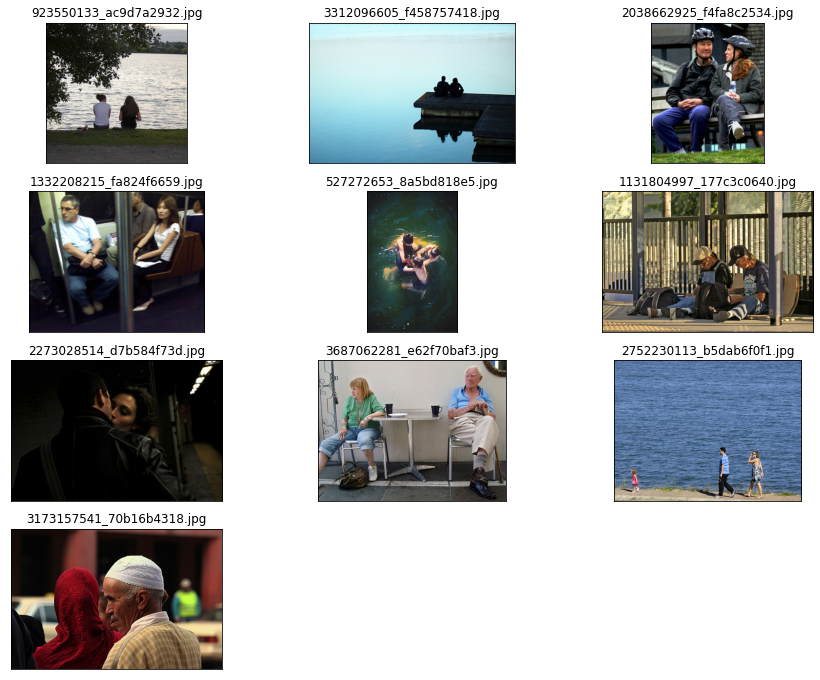

In [7]:
data.display_results(best_images)

### Using V3C1 sample dataset

In [2]:
DATASET_PATH

'/home/SharedFolder/VBS2021/dataset/resized_keyframes_test_10'

In [3]:
data = dataset(src_path=DATASET_PATH, feature_path=FEATURE_PATH)
data.get_file_name()


In [4]:
len(data.image_names)

10000

In [5]:
temp = data.encode_dataset(entire_dataset=False)

  0%|          | 0/1 [00:00<?, ?it/s]

Preprocess a subset of the dataset...


In [7]:
images = [Image.open(image_file) for image_file in temp]

#### Adjust the encoding function

In [8]:
import joblib

In [7]:
entire_dataset = False
if entire_dataset:
    print('Preprocess the whole dataset...')
    batches = math.ceil(len(self.image_names) / self.batch_size)
else:
    print('Preprocess a subset of the dataset...')
    batches = 10



Preprocess a subset of the dataset...


In [1]:
# feature_path = FEATURE_PATH
# batch_size = 16
# # Process each batch
# for i in tqdm(range(batches)):
#     batch_ids_filename = os.path.join(feature_path, 'ids', f'{i:010d}.csv')
#     batch_features_filename = os.path.join(feature_path, 'features', f'{i:010d}.npy')
    
#     filename = os.path.join(feature_path, 'ids', f'{i:010d}.joblib')
#     batch_files = data.image_names[i*batch_size : (i+1)*batch_size]
#     batch_features = compute_clip_features(batch_files)
# #     # Only do the processing if the batch wasn't processed yet
# #     if not os.path.isdir(batch_features_filename):
# #         try:
# #             # Select the images for the current batch
# #             batch_files = self.image_names[i*self.batch_size : (i+1)*self.batch_size]

# #             # Compute the features and save to a numpy file
# #             batch_features = self.compute_clip_features(batch_files)
# #             np.save(batch_features_filename, batch_features)

# #             # Save the image IDs to a CSV file
# #             image_ids = [image_file.split('/')[-1] for image_file in batch_files]
#             image_ids_data = pd.DataFrame(image_ids, columns=['image_id'])
# #             image_ids_data.to_csv(batch_ids_filename, index=False)
# #         except:
# #             # Catch problems with the processing to make the process more robust
# #             print(f'Problem with batch {i}')

#### Compute features

In [5]:
# data.encode_dataset(entire_dataset=True)
# data.load_dataset()
print("Features: ", data.features)

Features:  None


In [6]:
data.load_dataset()
print("Features: ", len(data.features))

Features:  10000


Length of features:  10000


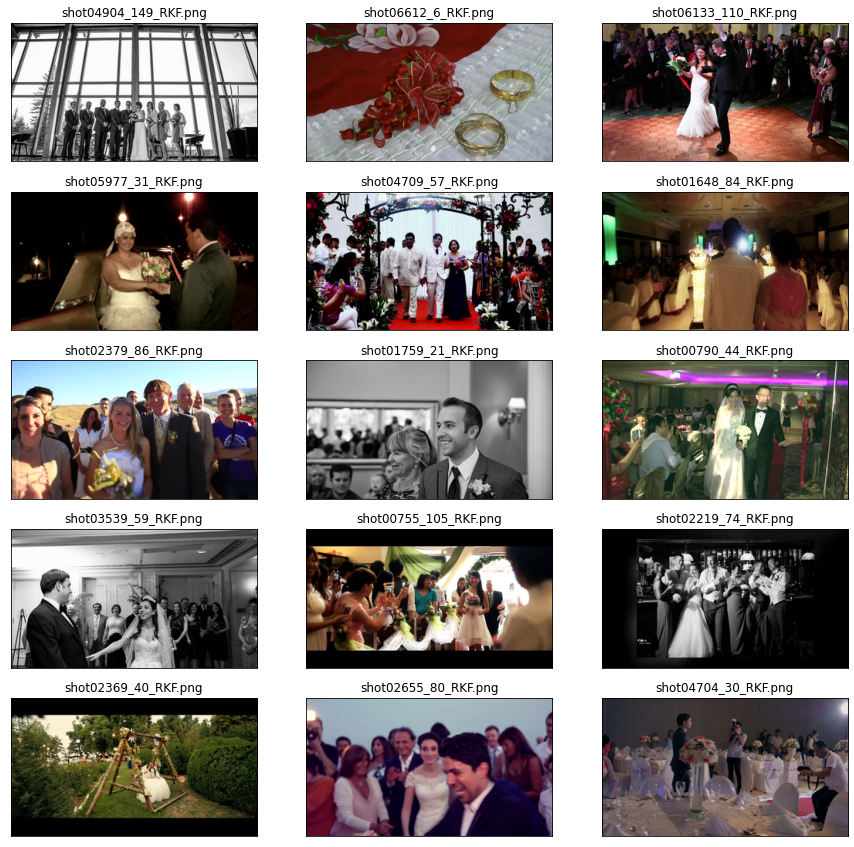

In [7]:
query = "photo of wedding"
best_images = data.search_query(query, num_matches=100)
print("Length of features: ", len(data.features))
# print("Best images: ", best_images)
data.display_results(best_images[:15])

In [9]:
with open('sample.txt', 'w') as f:
    for item in best_images:
        f.write("%s\n" % item['path'])

In [10]:
pwd

'/home/ntnhu/DCU/projects/VBS2022/CLIPsearch'

In [9]:
temp = data.image_names[0].split('/')[-1]
# x = temp.split('/')[-1]
x = temp.split('_')[-3]
x[4:]

'00001'

Length of features:  10000
Best images:  [{'filename': 'shot03956_148_RKF.png', 'dataset': None, 'video': '03956', 'shot': '148'}, {'filename': 'shot05604_75_RKF.png', 'dataset': None, 'video': '05604', 'shot': '75'}, {'filename': 'shot00126_46_RKF.png', 'dataset': None, 'video': '00126', 'shot': '46'}, {'filename': 'shot02473_57_RKF.png', 'dataset': None, 'video': '02473', 'shot': '57'}, {'filename': 'shot04771_90_RKF.png', 'dataset': None, 'video': '04771', 'shot': '90'}, {'filename': 'shot03437_132_RKF.png', 'dataset': None, 'video': '03437', 'shot': '132'}, {'filename': 'shot03247_227_RKF.png', 'dataset': None, 'video': '03247', 'shot': '227'}, {'filename': 'shot06821_414_RKF.png', 'dataset': None, 'video': '06821', 'shot': '414'}, {'filename': 'shot07466_47_RKF.png', 'dataset': None, 'video': '07466', 'shot': '47'}, {'filename': 'shot07261_83_RKF.png', 'dataset': None, 'video': '07261', 'shot': '83'}, {'filename': 'shot06825_70_RKF.png', 'dataset': None, 'video': '06825', 'shot': 

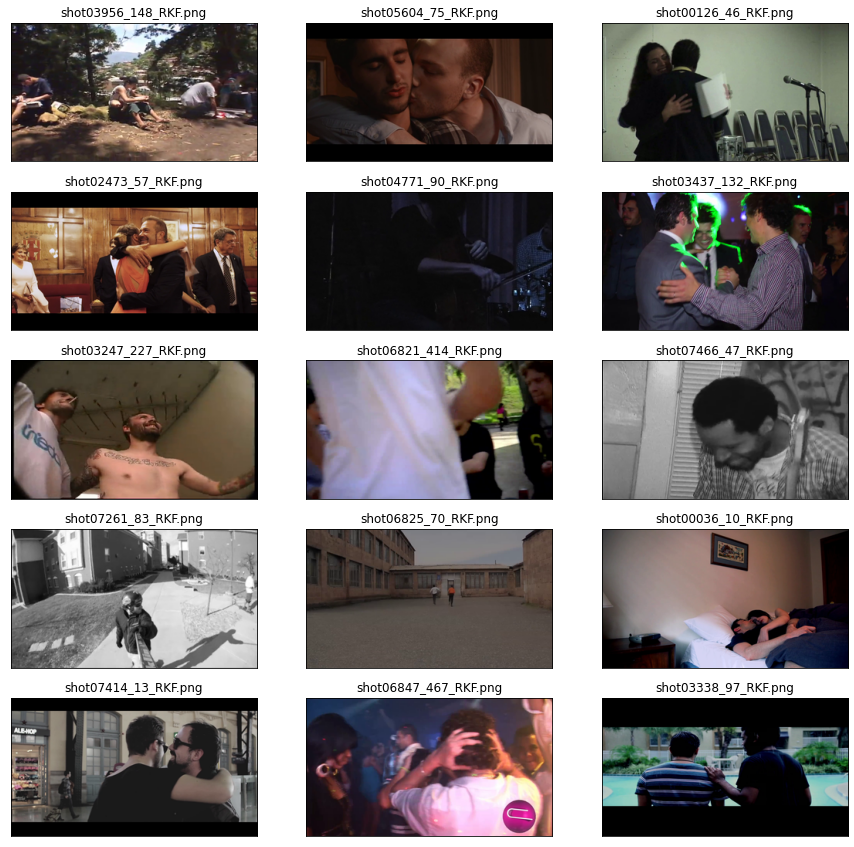

In [10]:
query = "two men hugging"
best_images = data.search_query(query, num_matches=30)
print("Length of features: ", len(data.features))
print("Best images: ", best_images)
data.display_results(best_images[:])

### Resize keyframes

In [2]:
resized_path = osp.join(DATASET_MASTER_PATH, 'resized_keyframes')
original_path = osp.join(DATASET_MASTER_PATH, 'keyframes/extract/00001')

In [3]:
filename_list = os.listdir(original_path)
len(filename_list)

114

In [4]:
img_path = filename_list[0]
img_path = osp.join(original_path, img_path)

In [6]:
img_path.split('/')

['',
 'mnt',
 'SEAGATE',
 'root',
 'V3C1',
 'keyframes',
 'extract',
 '00001',
 'shot00001_44_RKF.png']

In [32]:
import cv2
def resize_image(img_path, scale_percent=50, rename=False, filename=None):
    src_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    scale_percent = scale_percent

    #calculate the 50 percent of original dimensions
    width = int(src_img.shape[1] * scale_percent / 100)
    height = int(src_img.shape[0] * scale_percent / 100)
    dsize = (width, height)

    # resize image
    output = cv2.resize(src_img, dsize)
    
    if rename:
        cv2.imwrite(filename, output)
        return
        
    return output



In [33]:
resize_image(img_path, 25, rename=True, filename='abc.png')

In [28]:
output = resize_image(filename, 25)

In [29]:
output.shape

(180, 320, 3)